#ceci est mon test
Analyse des données de Maxell

## Présentation 
On alayse ci-dessous les données anthrométptrique de la collection Mawell


## Méthodes 
on effectuera notamment une ACP

In [2]:
library(here)
dat <- read.csv(
    file=here("data","maxwell.csv"),
    row.names=1,
    stringsAsFactor = TRUE) 
summary(dat)

here() starts at D:/Document/Formations/211115-ANF GitHub/mon-test-binder



 Lat    Sex         PUM             SPU             DCOX            IIMT      
 L:60   F:59   Min.   :59.40   Min.   :21.70   Min.   :169.0   Min.   :29.00  
 R:60   M:61   1st Qu.:68.80   1st Qu.:25.23   1st Qu.:198.0   1st Qu.:41.00  
               Median :72.40   Median :26.50   Median :209.5   Median :45.50  
               Mean   :72.23   Mean   :27.68   Mean   :209.9   Mean   :45.55  
               3rd Qu.:75.90   3rd Qu.:30.18   3rd Qu.:221.0   3rd Qu.:49.00  
               Max.   :81.20   Max.   :36.30   Max.   :242.0   Max.   :66.00  
               NA's   :7       NA's   :2                       NA's   :2      
      ISMM            SCOX             SS              SA       
 Min.   : 81.5   Min.   :125.0   Min.   :59.00   Min.   :59.80  
 1st Qu.:101.0   1st Qu.:152.0   1st Qu.:69.00   1st Qu.:74.95  
 Median :105.5   Median :157.0   Median :73.00   Median :78.80  
 Mean   :107.5   Mean   :157.1   Mean   :73.77   Mean   :79.06  
 3rd Qu.:115.0   3rd Qu.:164.0   3rd Qu.:78

## Description de l'environnement logiciel 

In [3]:
library(FactoMineR)
library(missMDA)
library(randomForest)
library(visdat)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [4]:
#important à faire car ça permet de mémoriser sur quoi a tourné le programme
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 19043)

Matrix products: default

locale:
[1] LC_COLLATE=French_France.1252  LC_CTYPE=French_France.1252   
[3] LC_MONETARY=French_France.1252 LC_NUMERIC=C                  
[5] LC_TIME=French_France.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] visdat_0.5.3        randomForest_4.6-14 missMDA_1.18       
[4] FactoMineR_2.4      here_1.0.1         

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-6         tidyselect_1.1.1     repr_1.1.3          
 [4] purrr_0.3.4          lattice_0.20-45      colorspace_2.0-2    
 [7] vctrs_0.3.8          generics_0.1.1       htmltools_0.5.2     
[10] base64enc_0.1-3      utf8_1.2.2           rlang_0.4.12        
[13] pillar_1.6.4         withr_2.4.2          glue_1.4.2          
[16] DBI_1.1.1            uuid_1.0-2           foreach_1.5.1      

## Exploration des données manquantes

petit moyen d'évaluer les données manquantes ; on voit par exemple qu'un des inds a 7 valeurs manquantes (et donc si on impute il y aura 7 valeurs imputées sur 10 et donc il faut envisager de virer cet individu) 

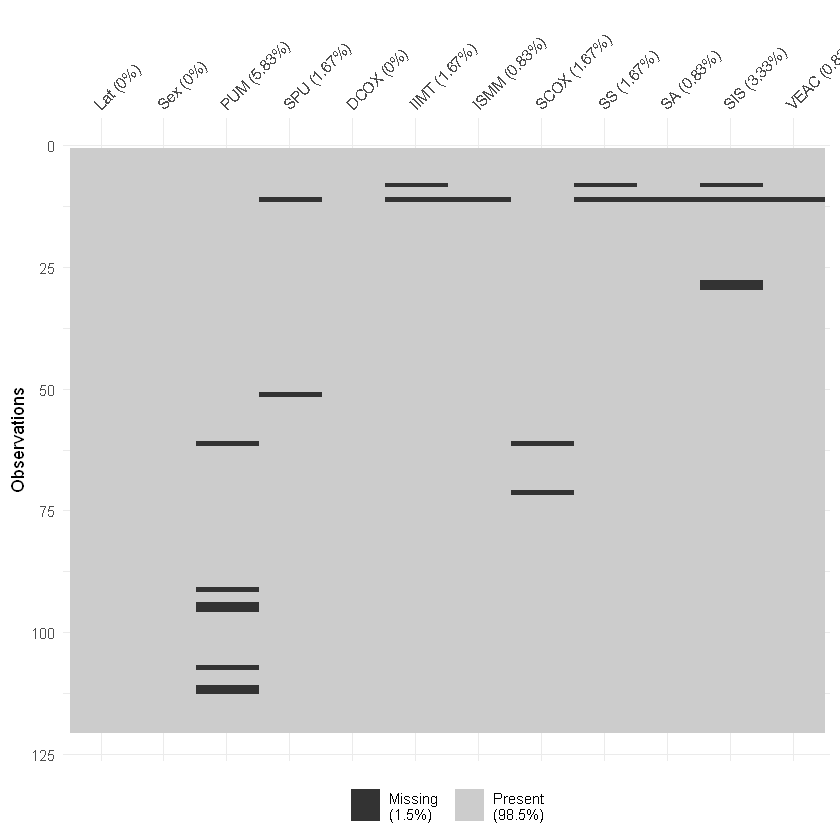

In [6]:
vis_miss(dat)

### Exploration en ACP 
en fait on ne va pas imputer des données manquantes pour gagner du temps et on va faire une acp en utilisant FactoMineR 

Warning message in PCA(dat, graph = FALSE, quali.sup = 1:2):
"Missing values are imputed by the mean of the variable: you should use the imputePCA function of the missMDA package"


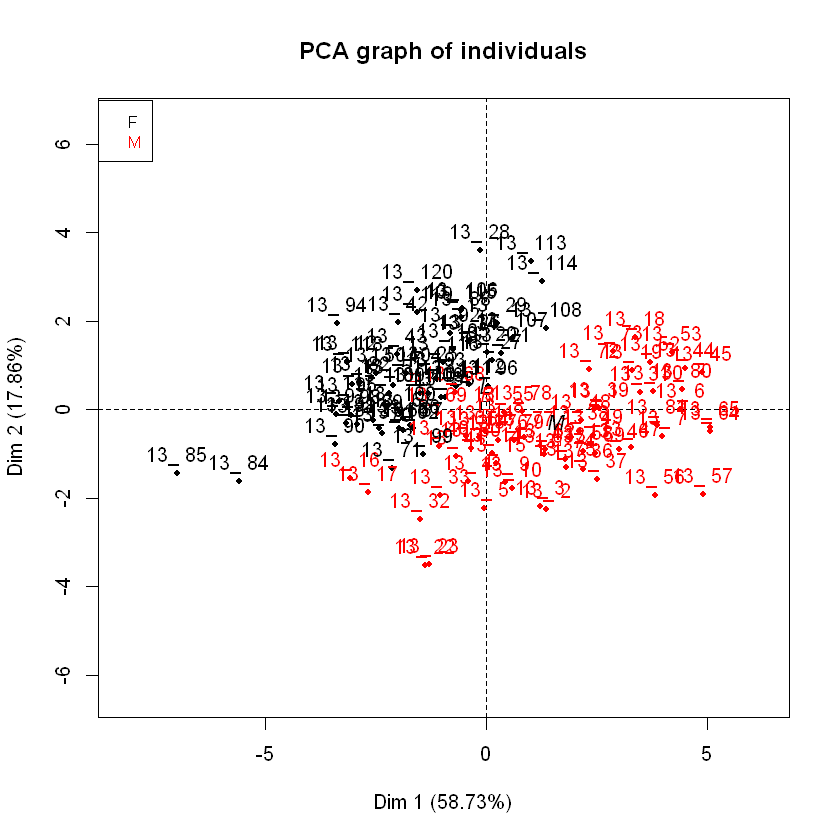

In [14]:
res <- PCA(dat,graph = FALSE, quali.sup = 1:2)
# on ne veut pas le graphique par défaut ; et le quali.sup donne les deux premières colonnes en variables supplémentaires 
# attention par défaut PCA a imputé les données manquantes et le warning explique comment ça a été fait 
plot(res, choix = "ind", habillage = 2, graph.type = "classic")
# habillage = 2 dit que les couleurs sont dépendantes de la 2ème variable qui est sex
# on a un bug de package jupyter cette semaine sur la ggplot et donc on a dû indiquer graph.type ; normalement on aurait rien dû mettre et ça aurait dû être plus beau 
